# The Keyboard Module

In [22]:
import pandas
from keymonkey import *

The keyboard Module knows about the keyboard model and layout

## The Data Structure for Keyboards and Layouts

The **KeySwitch** structure holds data about each physical key on the keyboard. A collection of KeySwitches is a **Keyboard**. The **PC_keybord** holds a typical PC or laptop keyboard. Easy we can define other spacial keyboards for further study. A random sample of the netrics of a typical keyboard is showed bellow:

In [2]:
list(map(lambda _: random.choice([v for k,v in PC_keyboard.items()]), range(5)))

[KeySwitch(keycode=42, finger=3, hand='L', line=2, effort=0.0, special=0),
 KeySwitch(keycode=29, finger=6, hand='R', line=1, effort=3.0, special=0),
 KeySwitch(keycode=27, finger=3, hand='L', line=1, effort=2.0, special=0),
 KeySwitch(keycode=59, finger=7, hand='R', line=3, effort=2.0, special=0),
 KeySwitch(keycode=31, finger=7, hand='R', line=1, effort=2.0, special=0)]

Some well known layouts is defined first. The **KeyAction** data structure holds the lower, upper, altenativer lower and alternative upper keys for a layout assignment. Thus is possible to optise 2 layouts at the same time, like Greek and English.

A random choise of assignments of KeyActions to KeyCaps is given bellow:

In [3]:
list(map(lambda _: random.choice([(k,v) for k,v in Querty.items()]), range(5)))

[(KeySwitch(keycode=58, finger=6, hand='R', line=3, effort=2.0, special=0),
  KeyAction(a='m', sa='M', b='Greek_mu', sb='Greek_MU')),
 (KeySwitch(keycode=59, finger=7, hand='R', line=3, effort=2.0, special=0),
  KeyAction(a='comma', sa='less', b='comma', sb='less')),
 (KeySwitch(keycode=24, finger=0, hand='L', line=1, effort=2.0, special=0),
  KeyAction(a='q', sa='Q', b='semicolon', sb='colon')),
 (KeySwitch(keycode=42, finger=3, hand='L', line=2, effort=0.0, special=0),
  KeyAction(a='g', sa='G', b='Greek_gamma', sb='Greek_GAMMA')),
 (KeySwitch(keycode=28, finger=3, hand='L', line=1, effort=2.5, special=0),
  KeyAction(a='t', sa='T', b='Greek_tau', sb='Greek_TAU'))]

This correspond to this cost assignments

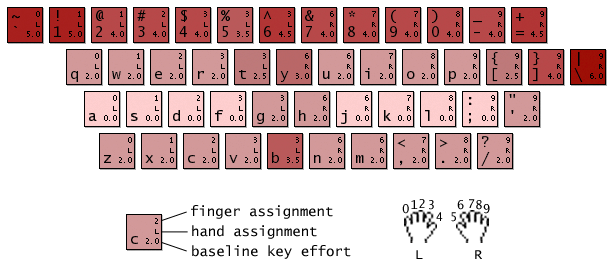

In [4]:
display(Image("../docs/keyboard-cost.png"))

## Graphical display of a keyboard
Using the X11 system we can get with the help of a bash script a graphical iamge of a given layout. We can also try it with a simple command.

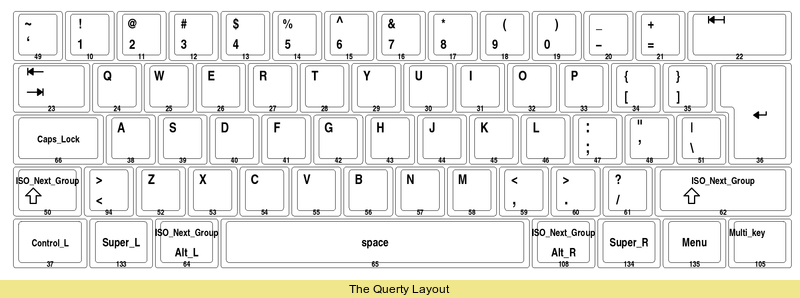

In [5]:
showkbd(Querty,label="The Querty Layout")

We can mutate keyboards. Here we exchange keycode 32, with keycode 58

## Mutations and Crossovers

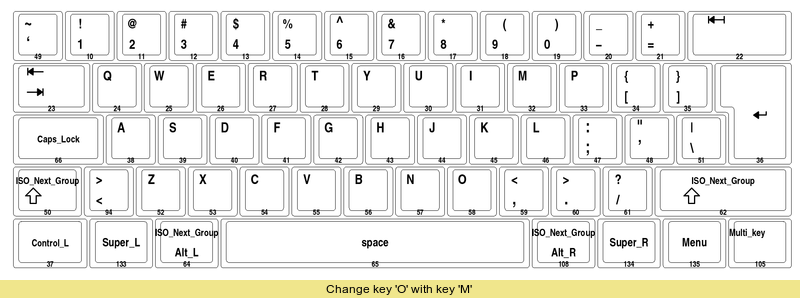

In [6]:
mutA=Querty.copy()
kbd_swap_keys(mutA,32,58)
showkbd(mutA,label="Change key 'O' with key 'M'")

Or ask to do randomly a number of mutations :

In [7]:
mutB=Querty.copy()
kbd_mutate(mutB,mutations=6)

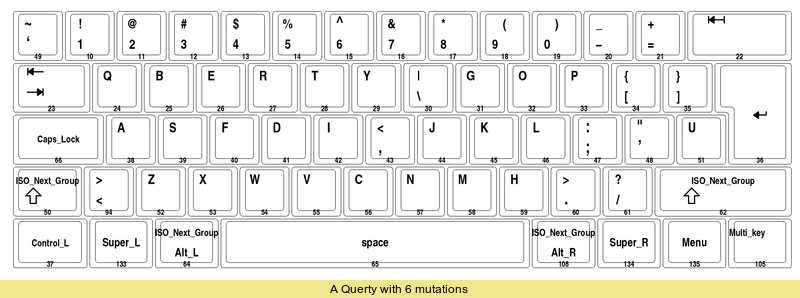

In [8]:
showkbd(mutB,label="A Querty with 6 mutations")

We can get the distance and the key diffs, from a specific keyboard easy

In [9]:
kbd_diffs(mutB,Querty)

[40, 41, 42, 43, 51, 54, 56, 25, 59, 30, 31]

In [10]:
kbd_distance(mutB,Querty)

11

In [11]:
from keyboard import *
genB=kbd_crossover(mutB,Querty,percent=0.5,debug=True)

A_54:w -> B_25:c
A_56:c -> B_54:b
A_59:h -> B_43:comma


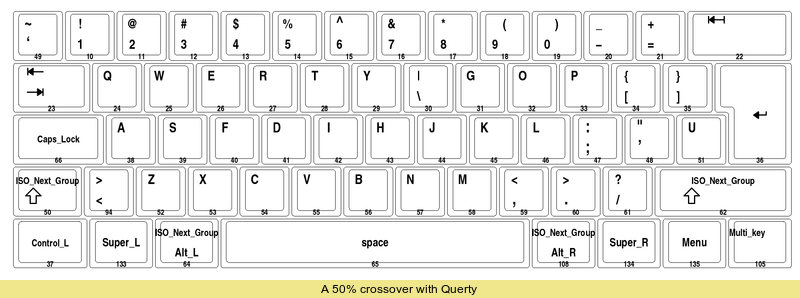

In [12]:
showkbd(genB,label="A 50% crossover with Querty")

In [13]:
kbd_distance(genB,mutB)

5

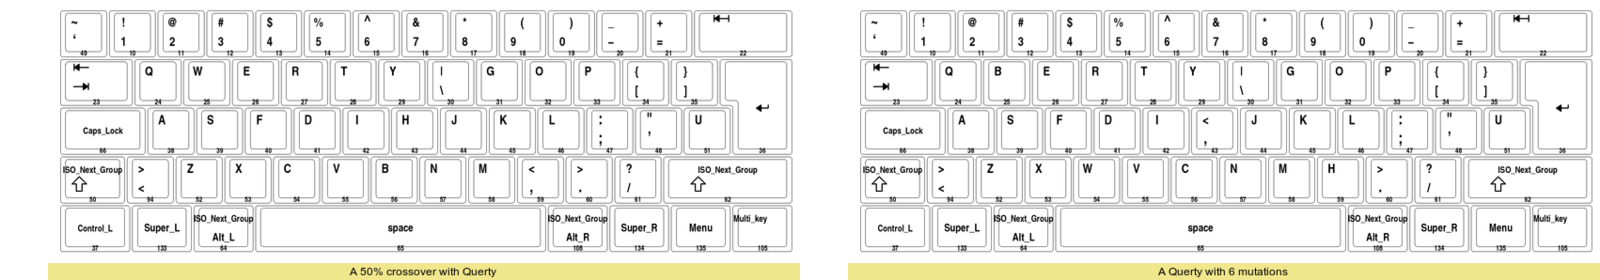

In [14]:
showkbd_side(genB,mutB)

## Initial Generation creation

In [15]:
populationSize   = 50
initialMutations = 31
population=generate_population_from(Querty,populationSize,initialMutations)

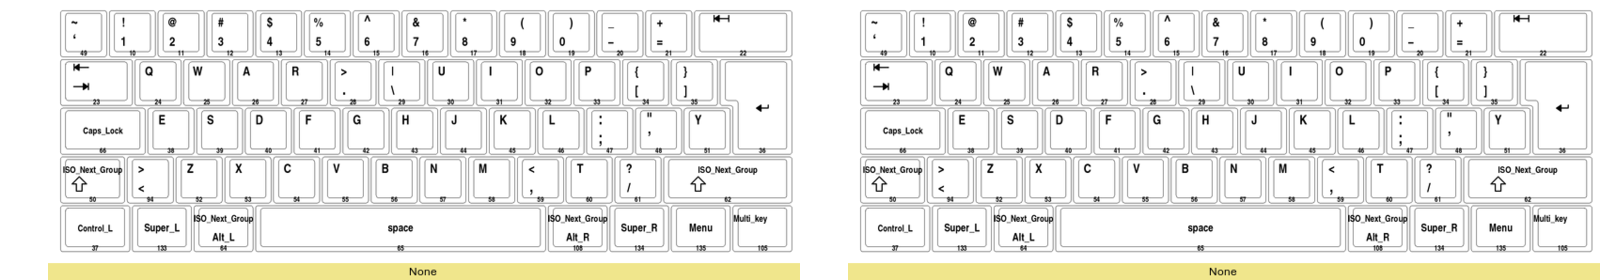

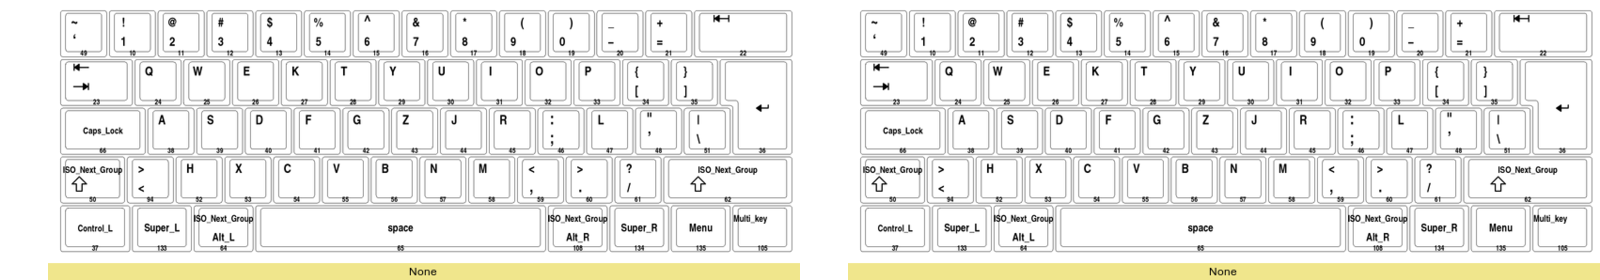

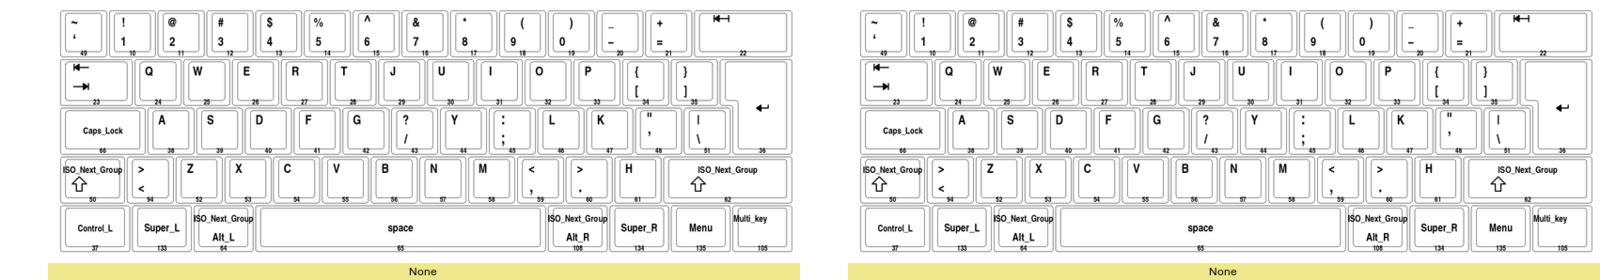

In [16]:
showkbd_side(population[0],population[1])
showkbd_side(population[2],population[3])
showkbd_side(population[4],population[5])

Calculate Population Distances

In [19]:
pm= population_matrix(population)
#pandas.DataFrame(pm)

In [18]:
mean=numpy.mean(pm)
print("Distance average: {}".format(mean))

Distance average: 10.1888


# Read a corpus Text

In [23]:
strokes = read_corpus("../data/longos_small.txt")